In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Random Forest

## Imports & Basic Data Setup

In [7]:
import numpy as np
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK dependencies
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Data loading (spam_dataset is already loaded as per instructions)
spam_dataset = pd.read_csv('/content/drive/MyDrive/data/spam.csv', encoding = "ISO-8859-1", usecols=[0, 1], names=['Spam', 'Text'],
                           skiprows=1)
spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])
spam_dataset
print(spam_dataset.head())
print(spam_dataset.info())
print(spam_dataset['Spam'].value_counts())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   Spam                                               Text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Spam    5572 non-null   int64 
 1   Text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None
Spam
0    4825
1     747
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-7-14af0b7468ec>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])


## Text Preprocessing

In [10]:
import numpy as np
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK dependencies
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # This line has been added to download the necessary resource

# Data loading
spam_dataset = pd.read_csv('/content/drive/MyDrive/data/spam.csv', encoding = "ISO-8859-1", usecols=[0, 1], names=['Spam', 'Text'],
                           skiprows=1)
spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])
spam_dataset
print(spam_dataset.head())
print(spam_dataset.info())
print(spam_dataset['Spam'].value_counts())

   Spam                                               Text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Spam    5572 non-null   int64 
 1   Text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None
Spam
0    4825
1     747
Name: count, dtype: int64


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-10-c4d64f4092c9>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])


In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
  """
  Cleans the input text by removing punctuation, lowercasing,
  removing stop words, and lemmatizing.

  Args:
    text: The input text string.

  Returns:
    The cleaned text string.
  """
  # Remove punctuation and lowercase
  text = text.translate(str.maketrans('', '', string.punctuation)).lower()

  # Tokenize
  tokens = nltk.word_tokenize(text)

  # Remove stop words and lemmatize
  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()
  cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]

  return ' '.join(cleaned_tokens)

# Apply the cleaning function to create a new 'Cleaned' column
spam_dataset['Cleaned'] = spam_dataset['Text'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## TF-IDF Vectorization & Train/Test Split

In [13]:
# Vectorize
tfidf = TfidfVectorizer(min_df=0.001, max_df=0.5, ngram_range=(1,1), use_idf=True)
X_all = tfidf.fit_transform(spam_dataset['Cleaned'])
y_all = spam_dataset['Spam']

print("Shape of TF-IDF matrix:", X_all.shape)

# Stratified Split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.3, random_state=42, stratify=y_all
)


Shape of TF-IDF matrix: (5572, 1352)


## Random Forest + Feature Importances + Feature Selection

In [15]:
# Train a basic RF
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

print("Base RF Accuracy on Train:", rf_base.score(X_train, y_train))
print("Base RF Accuracy on Test :", rf_base.score(X_test, y_test))

# Extract feature importances
importances = rf_base.feature_importances_  # array length = number of columns
feature_names = tfidf.get_feature_names_out()

# Select features with importance > 0.001
selected_indices = [i for i, imp in enumerate(importances) if imp > 0.001]
print("Selected features count:", len(selected_indices))

# Reduce X_train, X_test to only those columns
X_train_sel = X_train[:, selected_indices]
X_test_sel  = X_test[:, selected_indices]


Base RF Accuracy on Train: 0.9997435897435898
Base RF Accuracy on Test : 0.979066985645933
Selected features count: 185


Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

=== Final Model Scores ===
Accuracy on test: 0.9754784688995215
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1448
           1       0.96      0.86      0.90       224

    accuracy                           0.98      1672
   macro avg       0.97      0.93      0.94      1672
weighted avg       0.98      0.98      0.97      1672



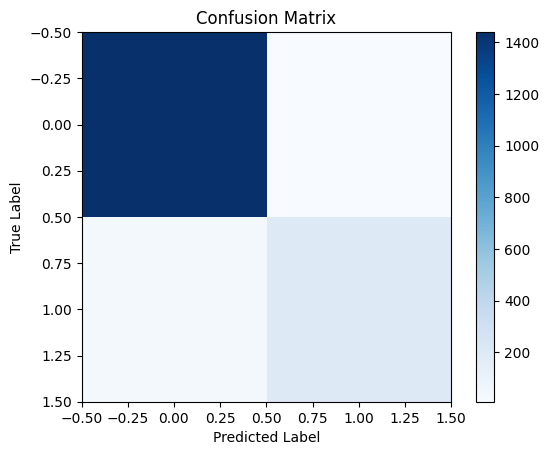

In [16]:
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}

rf_gs = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)
rf_gs.fit(X_train_sel, y_train)

print("Best Params:", rf_gs.best_params_)
best_rf = rf_gs.best_estimator_

# Evaluate on test set
y_pred_test = best_rf.predict(X_test_sel)

print("\n=== Final Model Scores ===")
print("Accuracy on test:", best_rf.score(X_test_sel, y_test))
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
